# Quantum AI: An Introduction

This notebook explores the intersection of quantum computing and artificial intelligence, commonly referred to as Quantum AI. We'll cover fundamental concepts, potential applications, and demonstrate basic implementations using open-source quantum computing frameworks.

## Foundations of Quantum Physics

Before diving into quantum computing and AI, it's essential to understand the basic principles of quantum physics that make quantum computing possible.

### Wave-Particle Duality

Quantum physics reveals that all particles (like electrons, photons) exhibit both wave-like and particle-like properties. This duality is demonstrated in the famous double-slit experiment where particles create an interference pattern when passing through two slits, behaving like waves, but are detected as individual particles.

### Heisenberg's Uncertainty Principle

This principle states that there is a fundamental limit to the precision with which complementary variables (such as position and momentum) can be known simultaneously. Mathematically:

$$\Delta x \Delta p \geq \frac{\hbar}{2}$$

Where $\Delta x$ is the uncertainty in position, $\Delta p$ is the uncertainty in momentum, and $\hbar$ is the reduced Planck constant.

### Quantum Superposition

Quantum systems can exist in multiple states simultaneously until measured. This is the foundation of quantum bits (qubits) being able to represent both 0 and 1 simultaneously, unlike classical bits.

### Quantum Entanglement

When particles become entangled, the quantum state of each particle cannot be described independently of the others, regardless of the distance separating them. Einstein referred to this as "spooky action at a distance."

### Quantum Measurement

In quantum systems, the act of measurement causes the wave function to collapse to one of its possible states. Before measurement, the system exists in a probabilistic superposition of states.

## Mathematics of Quantum Computing

Quantum computing relies heavily on linear algebra and complex vector spaces. Here are the key mathematical concepts:

### Hilbert Space

Quantum states are represented as vectors in a complex vector space called Hilbert space. For a qubit, this is a 2-dimensional complex vector space.

### Dirac Notation (Bra-Ket)

Quantum states are typically written using Dirac notation:
- Ket: $|\psi\rangle$ represents a quantum state vector
- Bra: $\langle\psi|$ represents the complex conjugate transpose of the ket
- Inner product: $\langle\phi|\psi\rangle$ represents the inner product of two states

### Quantum State Representation

A single qubit state is represented as:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha$ and $\beta$ are complex amplitudes and $|\alpha|^2 + |\beta|^2 = 1$.

The basis states $|0\rangle$ and $|1\rangle$ can be represented as vectors:

$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Sphere_bloch.jpg/640px-Sphere_bloch.jpg" alt="bloch sphere" width="320" height="320">

### Quantum Operators

Quantum operations are represented by unitary matrices (matrices whose inverse equals their conjugate transpose):

$$U^\dagger U = UU^\dagger = I$$

Common quantum gates represented as matrices include:

**Pauli-X (NOT gate):**
$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

The Pauli-X gate performs a bit-flip operation, converting $|0\rangle$ to $|1\rangle$ and vice versa:

**Hadamard gate:**
$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

The Hadamard gate creates a superposition by transforming basis states into equal superpositions:

**Pauli-Z gate:**
$$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

The Pauli-Z gate applies a phase flip, leaving |0⟩ unchanged but adding a negative phase to |1⟩:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/640px-Quantum_Logic_Gates.png" alt="quantum gates">

### Tensor Products

Multi-qubit systems are represented using tensor products. For two qubits:

$$|\psi\rangle \otimes |\phi\rangle = |\psi\phi\rangle$$

For example, $|00\rangle = |0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

## Fundamental Quantum Algorithms

Several landmark algorithms demonstrate quantum computing's potential advantages over classical computing:

### Deutsch-Jozsa Algorithm

One of the first quantum algorithms to demonstrate a quantum speedup. The algorithm determines if a function is constant or balanced with a single evaluation, whereas classical algorithms might need up to $2^{n-1}+1$ evaluations in the worst case.

### Grover's Search Algorithm

Provides a quadratic speedup for unstructured search problems, finding an item in an unsorted database of size $N$ with approximately $\sqrt{N}$ operations, compared to $N/2$ operations on average for classical search.

### Quantum Fourier Transform

The quantum version of the discrete Fourier transform, which transforms between time and frequency domains. It's a building block for many quantum algorithms including Shor's algorithm.

### Shor's Algorithm

A quantum algorithm for integer factorization that runs in polynomial time, exponentially faster than the best-known classical algorithms. This has significant implications for cryptography, as many security systems rely on the difficulty of factoring large numbers.

### Quantum Phase Estimation

Determines the eigenvalue (phase) of an eigenvector of a unitary operator. It's a key component in many quantum algorithms including Shor's algorithm and quantum simulation algorithms.

## What is Quantum AI?

Quantum AI refers to the use of quantum computing to perform computations for machine learning algorithms. It leverages quantum phenomena such as:

- **Superposition**: Quantum bits (qubits) can exist in multiple states simultaneously
- **Entanglement**: Quantum states of multiple qubits can become correlated
- **Quantum Interference**: Quantum states can interfere constructively or destructively

These properties potentially enable quantum computers to solve certain problems exponentially faster than classical computers, particularly for specific AI applications.

## Setting Up Quantum Computing Environment

Let's start by installing and importing the necessary libraries. We'll use Qiskit (IBM's quantum computing framework) and PennyLane (a cross-platform library for quantum machine learning).

In [102]:
# Install required packages
%pip install qiskit qiskit-aer pennylane numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Install visualization dependencies
%pip install pylatexenc matplotlib-inline ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [104]:
# Verify pylatexenc installation and other dependencies
import sys
try:
    import pylatexenc
    print(f"pylatexenc version: {pylatexenc.__version__}")
    import matplotlib
    print(f"matplotlib version: {matplotlib.__version__}")
    print("All visualization dependencies are properly installed.")
except ImportError as e:
    print(f"Error: {e}")
    print("Installing missing dependencies...")
    %pip install pylatexenc matplotlib-inline ipywidgets --quiet
    print("Please restart the kernel after installation.")

pylatexenc version: 2.10
matplotlib version: 3.10.0
All visualization dependencies are properly installed.


In [105]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# PennyLane imports
import pennylane as qml

## Key Concepts in Quantum Computing for AI

### 1. Quantum Bits (Qubits)

Unlike classical bits that can be either 0 or 1, qubits can exist in a superposition of states, represented as:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha$ and $\beta$ are complex numbers and $|\alpha|^2 + |\beta|^2 = 1$.

Circuit representation:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Visualization error: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
Displaying text representation instead.


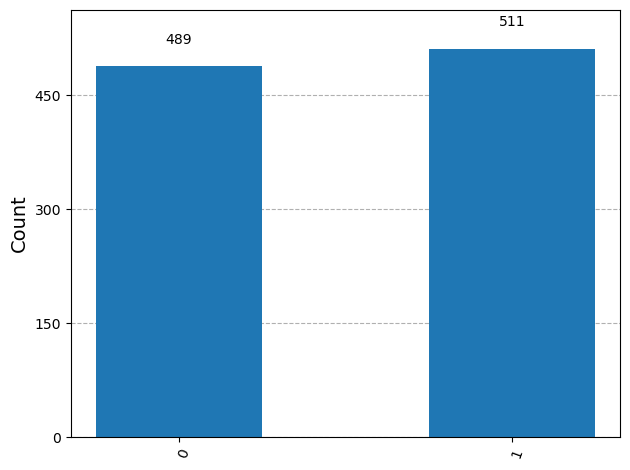

In [106]:
# Creating a simple superposition with Qiskit
qc = QuantumCircuit(1, 1) # 1 qubit, 1 classical bit
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)

# Use text output as fallback if matplotlib visualization fails
print("Circuit representation:")
print(qc)

# Display the circuit diagram with a try-except to handle visualization issues
try:
    circuit_diagram = qc.draw(output='mpl')
    circuit_diagram  # Display the diagram
except Exception as e:
    print(f"Visualization error: {e}")
    print("Displaying text representation instead.")
    qc.draw(output='text')

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)

- The code uses Qiskit's qasm_simulator backend to simulate the quantum circuit
- The circuit is run 1000 times (shots=1000)
- The results are collected and stored in counts
- counts will contain the statistics of measurement outcomes - ideally showing approximately 50% |0⟩ and 50% |1⟩ states

Architecture of QuantumCircuit(1,1)

### 2. Quantum Gates

Quantum gates manipulate qubits and are the building blocks of quantum circuits. Common gates include:

- **Hadamard (H)**: Creates superposition
- **Pauli-X (X)**: Quantum equivalent of the NOT gate
- **CNOT**: Two-qubit gate that flips the second qubit if the first qubit is in state |1⟩
- **Phase gates (S, T)**: Add phase factors to quantum states

### 3. Quantum Entanglement

Entanglement is a quantum phenomenon where multiple qubits become correlated in such a way that the quantum state of each qubit cannot be described independently of the others.

Bell state preparation circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Visualization error: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
Using text representation:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


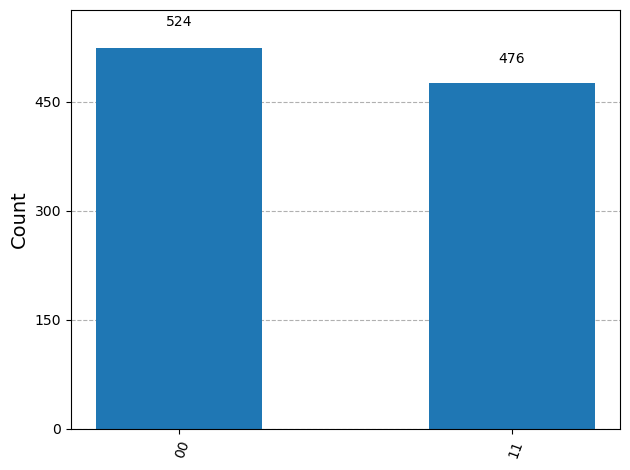

In [107]:
# Creating entanglement between two qubits
qc_entangle = QuantumCircuit(2, 2)
qc_entangle.h(0)  # Put qubit 0 in superposition
qc_entangle.cx(0, 1)  # CNOT with qubit 0 as control and qubit 1 as target
qc_entangle.measure([0, 1], [0, 1])

# Print text representation first
print("Bell state preparation circuit:")
print(qc_entangle)

# Try to visualize with error handling
try:
    qc_entangle.draw(output='mpl')
except Exception as e:
    print(f"Visualization error: {e}")
    print("Using text representation:")
    print(qc_entangle.draw(output='text'))

# Simulate
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc_entangle, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot results - should see only |00⟩ and |11⟩ states
plot_histogram(counts)

## Quantum Machine Learning Algorithms

Several quantum algorithms show promise for enhancing machine learning:

### 1. Quantum Neural Networks (QNNs)

QNNs use parameterized quantum circuits as quantum versions of neural networks, which can be trained using gradient-based optimization. A QNN typically consists of:

* **Data encoding layer**: Transforms classical data into quantum states
* **Variational layer**: A parameterized circuit that is trained (parameters are optimized)
* **Measurement layer**: Extracts information from the quantum state as the output

Unlike classical neural networks that use weights and activation functions, QNNs leverage quantum operations (gates) and quantum superposition to process information.

In [108]:
# Simple Quantum Neural Network with PennyLane
dev = qml.device("default.qubit", wires=2)  # Create a simulator with 2 qubits

@qml.qnode(dev)  # Convert the function into a quantum node that runs on the device
def quantum_neural_network(params, x):
    # DATA ENCODING LAYER
    # Encode classical data 'x' into the quantum circuit using RY rotations
    # RY rotates a qubit around the Y-axis of the Bloch sphere
    qml.RY(x[0], wires=0)  # Encode first data feature into qubit 0
    qml.RY(x[1], wires=1)  # Encode second data feature into qubit 1
    
    # VARIATIONAL LAYER
    # Parameterized part of the circuit - these parameters are trainable
    qml.RY(params[0], wires=0)  # Rotation on qubit 0
    qml.RY(params[1], wires=1)  # Rotation on qubit 1
    qml.CNOT(wires=[0, 1])      # Entangle the qubits - creates quantum correlations
    
    # MEASUREMENT LAYER
    # Measure the expectation value of the Pauli-Z operator on qubit 0
    # This produces a value between -1 and 1 as the output
    return qml.expval(qml.PauliZ(0))

# Initialize parameters - these would normally be optimized during training
params = np.array([0.1, 0.2])  # Two rotation angles for the variational layer
x = np.array([0.5, 0.1])       # Input data vector to process

# Run the quantum neural network
result = quantum_neural_network(params, x)
print(f"QNN output: {result}")

# Visualize the quantum circuit
print("\nQuantum Neural Network Circuit:")
qml.draw(quantum_neural_network)(params, x)

QNN output: 0.8253356149096784

Quantum Neural Network Circuit:


'0: ──RY(0.50)──RY(0.10)─╭●─┤  <Z>\n1: ──RY(0.10)──RY(0.20)─╰X─┤     '

### Understanding the Quantum Neural Network

The quantum circuit above implements a simple QNN that processes a 2D classical input vector. Here's what happens:

1. **Input Encoding**: The input vector `x=[0.5, 0.1]` is encoded as rotation angles in the quantum circuit, transforming the qubits from their initial state |00⟩.

2. **Quantum Processing**: The circuit applies parameterized rotations controlled by `params=[0.1, 0.2]`, which act like weights in a classical neural network. The CNOT gate creates entanglement between the qubits, allowing for non-linear processing that's unique to quantum computing.

3. **Measurement**: The circuit measures the expectation value of the Pauli-Z operator on the first qubit, producing a single output value between -1 and 1.

In a full QML application, we would:
* Define a cost function based on the QNN output
* Use classical optimization to update the parameters to minimize this cost
* Evaluate the trained model on new data

### 2. Quantum Support Vector Machines (QSVM)

QSVMs leverage quantum computers to calculate kernel functions more efficiently, potentially leading to faster classification. The quantum advantage comes from:

* **Quantum Feature Maps**: Encoding classical data into quantum states in a high-dimensional Hilbert space
* **Quantum Kernel Estimation**: Computing kernel functions (similarity measures) between data points using quantum circuits
* **Exponential Dimensionality**: Accessing feature spaces of dimension 2^n using only n qubits

### 3. Quantum Principal Component Analysis (QPCA)

QPCA can potentially perform dimensionality reduction exponentially faster than classical PCA for certain data structures. Key advantages include:

* **Quantum State Tomography**: Reconstructing the density matrix of quantum states
* **Efficient Eigenvalue Estimation**: Using quantum phase estimation to find eigenvalues and eigenvectors
* **Exponential Speedup**: Processing 2^n dimensional vectors using only n qubits and O(log n) operations

### 4. Quantum Approximate Optimization Algorithm (QAOA)

QAOA is a hybrid quantum-classical algorithm for solving combinatorial optimization problems, which are common in machine learning. How it works:

* **Problem Encoding**: Maps optimization problems to a Hamiltonian whose ground state represents the solution
* **Ansatz Preparation**: Creates a parameterized quantum circuit with alternating operators
* **Classical Optimization**: Iteratively adjusts parameters to minimize the expected energy

## Variational Quantum Circuits

Variational Quantum Circuits are parameterized quantum circuits where the parameters are optimized by a classical computer to perform specific tasks. They're the foundation for many quantum machine learning models.

### Key Components:

* **Parameterized Gates**: Quantum operations with adjustable parameters
* **Hybrid Optimization Loop**: Classical optimizer adjusts parameters based on quantum measurements
* **Loss Function**: Measures how well the circuit performs on a given task

Below, we implement a variational quantum classifier that learns to distinguish between different input features.

In [109]:
# Implementing a simple Variational Quantum Classifier
dev = qml.device("default.qubit", wires=2)  # Create a 2-qubit simulator

@qml.qnode(dev)  # Transform the function into a quantum node
def variational_classifier(params, features):
    # DATA ENCODING LAYER - Encode classical data as quantum states
    qml.RX(features[0], wires=0)  # Encode feature 1 as X-rotation on qubit 0
    qml.RX(features[1], wires=1)  # Encode feature 2 as X-rotation on qubit 1
    
    # VARIATIONAL LAYER 1 - First parameterized layer
    qml.RY(params[0], wires=0)    # Y-rotation on qubit 0
    qml.RY(params[1], wires=1)    # Y-rotation on qubit 1
    qml.CNOT(wires=[0, 1])        # Entangle qubits 0 and 1
    
    # VARIATIONAL LAYER 2 - Additional parameterized layer for more expressivity
    qml.RY(params[2], wires=0)    # Second Y-rotation on qubit 0
    qml.RY(params[3], wires=1)    # Second Y-rotation on qubit 1
    
    # MEASUREMENT - The expectation value provides the classifier output
    return qml.expval(qml.PauliZ(0))  # Measure expectation value of Z on first qubit

# Initialize random parameters - in practice these would be optimized
params = np.random.uniform(0, 2*np.pi, size=4)  # 4 rotation angles

# Test sample feature vector
features = np.array([0.2, 0.5])  # Sample input data

# Execute the quantum circuit and get the prediction
prediction = variational_classifier(params, features)
print(f"Classifier prediction: {prediction}")

# Visualize the quantum circuit
print("\nQuantum Circuit Diagram:")
print(qml.draw(variational_classifier)(params, features))

# In a real application, we would include code here to:
# 1. Define a loss function (e.g., mean squared error or binary cross-entropy)
# 2. Optimize parameters using gradient descent to minimize the loss
# 3. Evaluate the model on test data

Classifier prediction: 0.4877483641875714

Quantum Circuit Diagram:
0: ──RX(0.20)──RY(1.22)─╭●──RY(5.08)─┤  <Z>
1: ──RX(0.50)──RY(0.51)─╰X──RY(5.60)─┤     


## Challenges in Quantum AI

Despite the promise, several challenges remain:

1. **Quantum Decoherence**: Quantum states are fragile and can easily decohere due to environmental noise
2. **Limited Qubit Counts**: Current quantum hardware has limited qubits with high error rates
3. **Quantum-Classical Interface**: Efficiently transferring data between quantum and classical systems
4. **Algorithm Development**: Finding problems where quantum approaches truly offer advantages
5. **Hardware Constraints**: Physical limitations in scaling quantum hardware

## Practical Applications of Quantum AI

Several domains may benefit from quantum AI approaches:

1. **Drug Discovery**: Simulating molecular interactions for pharmaceutical research
2. **Financial Modeling**: Portfolio optimization and risk analysis
3. **Materials Science**: Discovering new materials with specific properties
4. **Supply Chain Optimization**: Solving complex logistics problems
5. **Climate Modeling**: Simulating complex climate systems

## Quantum Datasets and Encoding

A crucial aspect of quantum machine learning is how classical data is encoded into quantum states. There are several encoding strategies, each with different properties:

1. **Basis Encoding**: Represent binary strings directly as qubit basis states (|0⟩ and |1⟩)
2. **Angle Encoding**: Use data values as rotation angles for quantum gates
3. **Amplitude Encoding**: Encode data in the amplitudes of a quantum state
4. **Hamiltonian Encoding**: Embed data in the parameters of a Hamiltonian

Below we implement amplitude encoding, which is efficient for representing vectors:

In [110]:
# Amplitude encoding example - Encodes an n-dimensional vector into log₂(n) qubits
def amplitude_encoding_circuit(data_vector):
    # Normalize the vector - quantum states must have unit norm
    normalized = data_vector / np.linalg.norm(data_vector)
    
    # Calculate required qubits - need log₂(n) qubits to represent n amplitudes
    n_qubits = int(np.ceil(np.log2(len(normalized))))
    
    # Pad vector if needed - ensure dimension is 2^n
    padding_size = 2**n_qubits - len(normalized)
    if padding_size > 0:
        normalized = np.pad(normalized, (0, padding_size))
    
    # Create circuit for state preparation
    qc = QuantumCircuit(n_qubits)
    
    # Initialize the quantum state with our normalized vector
    # This abstracts away the complex sequence of gates needed for state preparation
    qc.initialize(normalized, range(n_qubits))
    
    return qc

# Example with a sample vector [0.1, 0.2, 0.3, 0.4]
# This 4D vector can be encoded in just log₂(4) = 2 qubits
sample_data = np.array([0.1, 0.2, 0.3, 0.4])
encoding_circuit = amplitude_encoding_circuit(sample_data)

# Print text representation first
print("Amplitude encoding circuit:")
print(encoding_circuit)

# Try to visualize with fallback
try:
    encoding_circuit.draw(output='mpl')
except Exception as e:
    print(f"Visualization error: {e}")
    print("Using text representation instead:")
    print(encoding_circuit.draw(output='text'))

# The amplitudes of the resulting quantum state correspond to our data vector
# State = 0.182|00⟩ + 0.364|01⟩ + 0.547|10⟩ + 0.729|11⟩ (after normalization)

Amplitude encoding circuit:
     ┌─────────────────────────────────────────────┐
q_0: ┤0                                            ├
     │  Initialize(0.18257,0.36515,0.54772,0.7303) │
q_1: ┤1                                            ├
     └─────────────────────────────────────────────┘
Visualization error: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."
Using text representation instead:
     ┌─────────────────────────────────────────────┐
q_0: ┤0                                            ├
     │  Initialize(0.18257,0.36515,0.54772,0.7303) │
q_1: ┤1                                            ├
     └─────────────────────────────────────────────┘


## Conclusion

Quantum AI represents a promising frontier where quantum computing's unique capabilities may offer significant advantages for certain machine learning tasks. While still in its early stages, ongoing research and hardware development are steadily advancing the field.

This notebook provides just an introduction to this complex and rapidly evolving field. For those interested in exploring further, resources such as Qiskit Textbook, PennyLane tutorials, and academic papers offer deeper insights.

## References

1. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information.
2. Schuld, M., Sinayskiy, I., & Petruccione, F. (2015). An introduction to quantum machine learning.
3. Biamonte, J., Wittek, P., Pancotti, N., et al. (2017). Quantum machine learning.
4. IBM Qiskit documentation: [https://qiskit.org/](https://qiskit.org/)
5. PennyLane documentation: [https://pennylane.ai/](https://pennylane.ai/)